# Inspect a Target Pixel File for a Centroid Offset

In this tutorial, we'll see how to use `vetpack` to inspect a Target Pixel File (TPF) for a centroid offset with just a few lines of code.

Let's start by importing `vetpack` and [`lightkurve`](https://docs.lightkurve.org/), the handy package `vetpack` relies on for interacting with Kepler, K2, and TESS data products.

In [1]:
import lightkurve as lk
import vetpack as vp

For this example, we're going to look at the TESS data on WASP-19, a known hot Jupiter host.
For context, let's quickly grab the TESS Sector 9 light curve and take a look at it.

In [2]:
target = 'WASP19'
search_result = lk.search_lightcurvefile(target, mission='TESS')
search_result

#,observation,target_name,productFilename,distance
0,TESS Sector 9,35516889,tess2019058134432-s0009-0000000035516889-0139-s_lc.fits,0.0


/Users/brackham/anaconda3/envs/vetpack-dev/lib/python3.8/site-packages/lightkurve/lightcurvefile.py:45: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  warnings.warn("`LightCurveFile.header` is deprecated, please use "


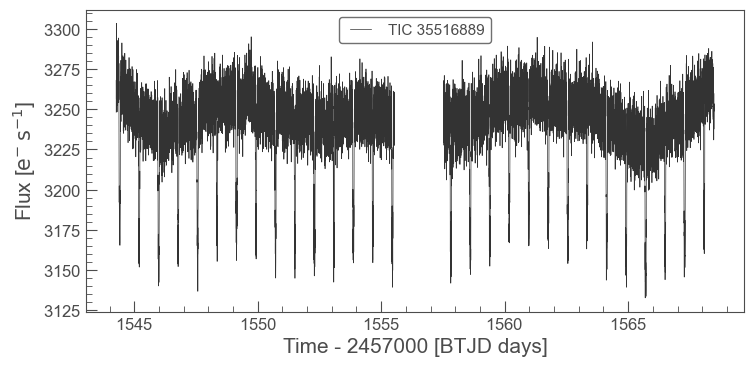

In [3]:
# Download the single search result and plot the light curve
lcf = search_result[0].download()
lcf.PDCSAP_FLUX.plot()

Nice light curve! You can clearly see the transits of WASP-19b as well as some out-of-transit variability due to rotation of the active host star WASP-19.

## Plotting the TPF

Now, let's grab the TPF for this dataset. We'll use `lightkurve` again.

In [4]:
sr = lk.search_targetpixelfile(target, mission='TESS')
tpf = sr[0].download()

`lightkurve` has the built-in ability to plot single frames of the TPF.

The default is to plot the first frame, which show significant artifacts due to systematics (scattered light, I think, in this case).

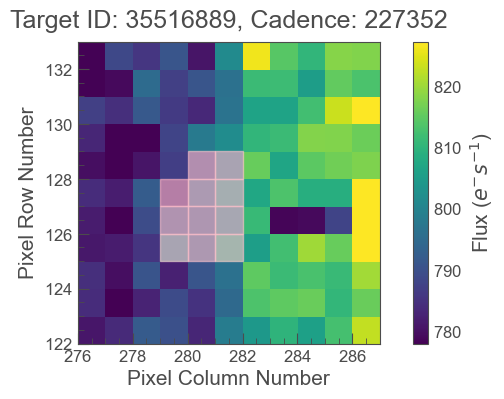

In [5]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

We can specify another frame, but that requires as bit of guesswork to find a representative frame if there are a lot of systematics.

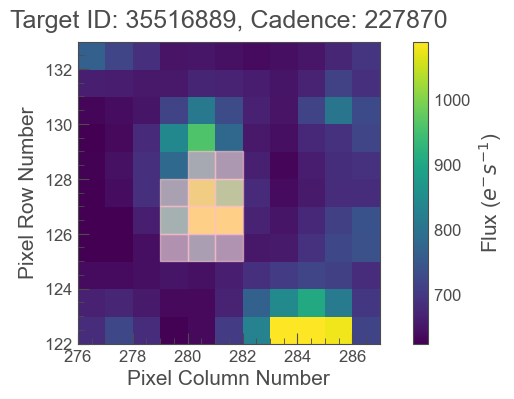

In [6]:
tpf.plot(aperture_mask=tpf.pipeline_mask, frame=500)

Or we can get around this issue by plotting a median image of the whole TPF with `vetpack`:

Text(0.5, 1.0, 'WASP19 Median Flux')

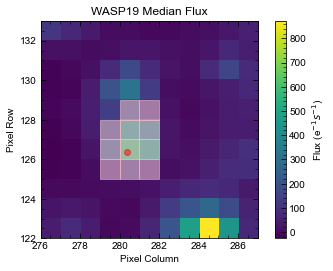

In [7]:
ax = vp.median_image(tpf)
ax.set_title(f'{target} Median Flux')

## Plotting a difference image of the TPF

Now, let's use `vetpack` to plot a in-transit/out-of-transit difference image so that we can visually inspect whether the flux decrement during transit events is indeed located on WASP-19. This, of course, is more useful for vetting candidate planets than analyzing data of confirmed planets like WASP-19b.

We'll need to specific the mid-transit time, period, and duration of the transit signal of interest. We'll use the parameters from Exo-FOP TESS for this.

In [8]:
# Parameters from
# https://exofop.ipac.caltech.edu/tess/target.php?id=35516889

t0 = 2458543.621948 - 2457000.  # TBJD
period = 0.788843
duration = 1.624113/24.

Pass them to `vetpack.difference_image()` along with the TPF object to easily see the result.

Text(0.5, 1.0, 'WASP19 In$-$Out Difference Flux')

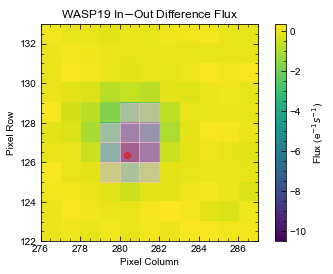

In [9]:
ax = vp.difference_image(tpf, t0, period, duration)
ax.set_title(f'{target} In$-$Out Difference Flux')

It does indeed seem that the flux decrement during transit is localized on the location of WASP-19. No surprises there (phew!).

That's it for now! More functionality is in development. Happy vetting!